# 판다스 (데이터프레임) 병합

In [1]:
import pandas as pd
import numpy as np

In [2]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 프레임 병합
- merge() : 데이터프레임 병합(합치기)
- concat() : 데이터프레임 연결

 ### merge() 
    - 두개의 데이터프레임에 공통되는 열(이름이 같은 열) 또는 행을 기준으로
    - 두개의 데이터프레임 병합
    - 이때 공통되는 열을 key라고 함  

merge 형식
- df1.merge(df2, how) : inner join  
- pd.merge(df1, df2, how) 

- how : 병합 방식  
    - how = 'inner' : key 값이 동일한 데이터만 포함  (디폴트로 생략 가능)
            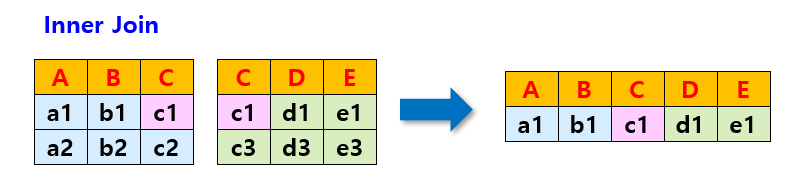
    - how = 'outer' : 모든 값 포함. 존재하지 않으면 NaN으로 표시  
        - how='left' : 왼쪽 df 기준  
            - 왼쪽 df의 데이터 모두 포함.   
            - 오른쪽 df에는 값이 존재하지 않으면 NaN 표시  
        - how='right' : 오른쪽 df 기준  
            - 오른쪽 df의 데이터 모두 포함.  
            - 왼쪽 df에는 값이 존재하지 않으면 NaN 표시 
            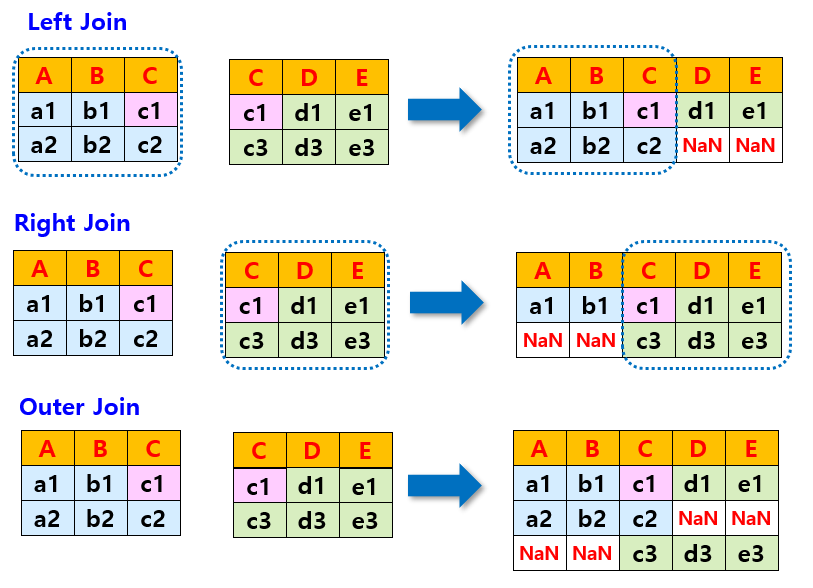
 



### 조인 방식    
- inner join (내부 조인) : 공통되는 열이 있을 때   
    - 공통 열의 값이 동일한 데이터만 포함  
- outer join : (외부 조인) : 공통되는 열이 없을 때  
    - 기준 df의 모든 데이터 포함. 값이 없으면 NaN 표시   
    - left, right, outer(full outer)

### 데이터 병합 (merge()) 예제 1

In [3]:
# 데이터프레임 생성

df1 =pd.DataFrame({
    'A' : ['a1', 'a2'],
    'B' : ['b1', 'b2'],
    'C' : ['c1', 'c2']   
        })
df1

df2 =pd.DataFrame({
    'C' : ['c1', 'c3'],
    'D' : ['d1', 'd3'],
    'E' : ['e1', 'e3']   
        })
df2

,A,B,C
0,a1,b1,c1
1,a2,b2,c2


,C,D,E
0,c1,d1,e1
1,c3,d3,e3


In [7]:
# how = 'inner'  # inner join
# how = 'inner' : 디폴트로 생략 가능
df1.merge(df2)
df1.merge(df2, how = 'inner')

pd.merge(df1, df2)
pd.merge(df1, df2, how = 'inner')

,A,B,C,D,E
0,a1,b1,c1,d1,e1


,A,B,C,D,E
0,a1,b1,c1,d1,e1


,A,B,C,D,E
0,a1,b1,c1,d1,e1


,A,B,C,D,E
0,a1,b1,c1,d1,e1


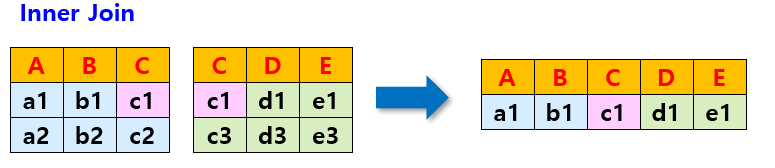

In [8]:
# how = 'left' # left outer join (왼쪽 외부  조인)
pd.merge(df1, df2, how='left')

,A,B,C,D,E
0,a1,b1,c1,d1,e1
1,a2,b2,c2,NaN,NaN


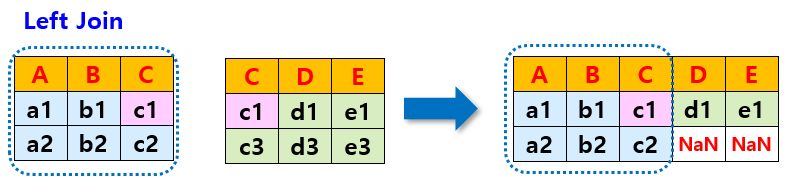

In [9]:
# how ='right' # right outer jlin (오른쪽 외부 조인)
pd.merge(df1,df2, how='right')

,A,B,C,D,E
0,a1,b1,c1,d1,e1
1,NaN,NaN,c3,d3,e3


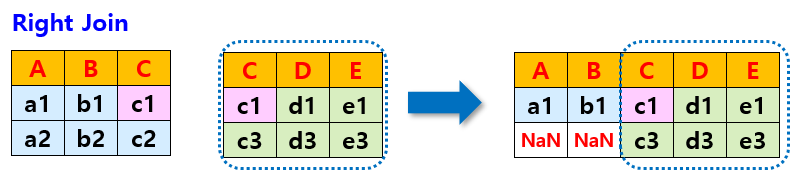

In [10]:
# how='outer' # full outer join 왼전 외부 조인 
pd.merge(df1,df2, how='outer')

,A,B,C,D,E
0,a1,b1,c1,d1,e1
1,a2,b2,c2,NaN,NaN
2,NaN,NaN,c3,d3,e3


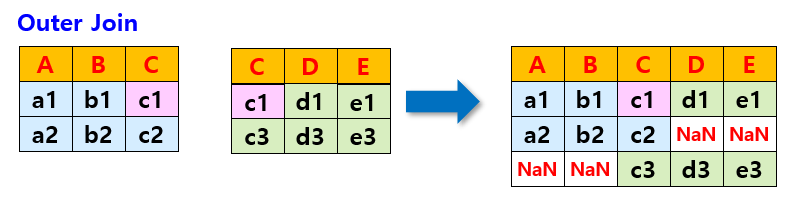

### 데이터 병합 (merge()) 예제 2

In [11]:
# df 생성 - 고객 정보를 담고 있는 df
df1 =pd.DataFrame({
    '고객번호' : [1001,1002,1003,1004,1005,1006,1007],
    '이름' : ['둘리','도우너','또치','길동','희동','마이콜','영희']})
df1

# df 생성 - 예금 정보 df
df2 = pd.DataFrame({
    '고객번호':[1001,1001,1005,1006,1008,1001],
    '금액' : [10000,20000,15000,5000,100000,30000]})
df2

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [13]:
# df1과 df2 병합 : how='inner'
# 한 번이라도 예금을 한 적이 있는 고객 데이터 출력
# key 값 (고객번호 값)이 동일한 데이터만 포함

df1.merge(df2, how='inner')
pd.merge(df1, df2, how='inner')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [14]:
# how = 'left'
pd.merge(df1, df2, how='left')
# 의미 
# 금액이 NaN인 고객 : 예금을 한 적이 없는 고객

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [15]:
# how = 'right'
pd.merge(df1, df2, how='right')
# 1008 회원은 회원 데이터에 존재하지 않음
# 이런 경우 DB에서는 외래키 제약조건 때문에 오류 발생

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [16]:
# how = 'outer'
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


#### 키 값이 같은 여러 개의 데이터가 있는 경우
- 가능한 모든 경우의 수를 따져서 조합해서 만들어 낸다

In [17]:
# df1 생성 
#열: 품종, 꽃잎길이
df1 = pd.DataFrame({
    '품종':['setosa','setosa','virginica','virginica'],
    '꽃잎길이':[1.4,1.3,1.5,1.3]})
df1

# df2 생성 
#열 : 품종, 꽃잎너비
df2 = pd.DataFrame({
    '품종': ['setosa','virginica','virginica','ersicolor'],
    '꽃잎너비':[0.4,0.3,0.5,0.3]})
df2

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,ersicolor,0.3


In [18]:
# inner join
pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


데이터프레임 키 값이 같은 여러 개의 데이터가 있는 경우
- 가능한 모든 경우의 수를 따져서 조합해서 만들어 낸다

key : 품종
같은 key 값 존재
- df1 : setosa(1.4) setosa(1.3) virginica(1.5)  virginica(1.3)
- df2 : virginica(0.3) virginica(0.5)

setosa의 경우  
- 왼쪽 : 1.4, 1.3  
- 오른쪽 : 0.4  
    -> (1.4, 0.4), (1.3, 0.4)  

virginca의 경우  
- 왼쪽 : 1.5, 1.3  
- 오른쪽 : 0.3, 0.5  
    -> (1.5, 0.3), (1.5, 0.5), (1.3, 0.3), (1.3, 0.5)  

### 기준열 명시
두 데이터프레임에서 이름이 같은 열은 모두 키가 되는데 (공통 열)  
이름이 같아도 키로 사용할 수 없는 열이 존재  
이때는 on 인수로 기준열 명시  
- pd.merge(df1, df2, on, how)
- 기준열을 직접 지정 : on=기준열 이름
    - 반환 결과에 같은 이름의 열이 있는 경우에는 열이름_x, 열이름_y로 열이름을 변경해서 표현

예 :  
- 첫 번째 데이터프레임의 열 이름 [데이터] (실제 값 : 금액)  
- 두 번째 데이터프레임의 열 이름 [데이터] (실제 값 : 성별)  
    이 경우 열 이름이 같아도 다른 데이터이므로  
    이 열은 기준열이 되면 안 된다

In [20]:
# df 생성
df1 = pd.DataFrame({
    '고객명':['춘향', '춘향', '몽룡'],
    '날짜':['2023-02-01', '2023-02-02', '2023-02-03'],
    '데이터':['2000', '30000', '100000']})
df1

df2 = pd.DataFrame({
    '고객명':['춘향', '몽룡'],
    '데이터':['여자', '남자']})
df2

,고객명,날짜,데이터
0,춘향,2023-02-01,2000
1,춘향,2023-02-02,30000
2,몽룡,2023-02-03,100000


,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [21]:
# key로 사용할 기준 열을 명시하지 않고 병합한 경우
pd.merge(df1, df2)

,고객명,날짜,데이터


In [22]:
# key로 사용할 기준 열 명시
# 반환 결과에 동일한 열이름이 존재하는 경우 열이름_x, 열이름_y로 표시
pd.merge(df1, df2, on='고객명', how='inner')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2023-02-01,2000,여자
1,춘향,2023-02-02,30000,여자
2,몽룡,2023-02-03,100000,남자


In [23]:
# 참고 : 현제 데이터에는 키의 값이 동일한 값만 있기 때문에
# outer join 해도 동일한 결과 : NaN 없음
pd.merge(df1, df2, on='고객명', how='outer')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2023-02-01,2000,여자
1,춘향,2023-02-02,30000,여자
2,몽룡,2023-02-03,100000,남자


### 키가 되는 기준 열의 이름이 다를 경우
- 키가 되는 기준열이 두 데이터프레임에서 다르게 나타나면
    - left_on, right_on 인수를 사용해서 양쪽 df의 기준열 명시
    - 즉, left_on, right_on이 같은 열임을 나타냄
    - 예 : pd.merge(df1,df2, left_on='이름', right_on='성명')

In [24]:
# df 생성
df1=pd.DataFrame({
    '이름' :['영희','철수','철수'],
    '성적' :[90,80,80]
})
df1

df2 = pd.DataFrame({
    '성명' :['영희','영희','철수'],
    '성적2':[100,80,90]
})
df2

# 이름과 성명 열 이름은 달라도 같은 데이터이므로 이름=성명

,이름,성적
0,영희,90
1,철수,80
2,철수,80


,성명,성적2
0,영희,100
1,영희,80
2,철수,90


In [26]:
# 양쪽 df의 기준이 되는 열의 이름이 다르기 때문에 (실제 데이터는 동일)
# 양쪽 df에 기준열 명시
# left_on='이름', right_on='성명'
pd.merge(df1, df2, left_on='이름', right_on='성명')

,이름,성적,성명,성적2
0,영희,90,영희,100
1,영희,90,영희,80
2,철수,80,철수,90
3,철수,80,철수,90


#### 인덱스를 사용해서 병합
- 열이 아닌 인덱스를 기준으로 해서 병합 가능
- 왼쪽 데이터프레임의 인덱스를 사용하는 경우에는 left_index=True
- 오른쪽 데이터프레임의 인덱스를 사용하는 경우에는 right_index=True 설정
- 양쪽 데이터프레임의 key가 모두 인덱스 사용하는 경우
    - left_index=True, right_index=True 둘다 설정
- 한쪽 데이터프레임만 key가 인덱스 사용하는 경우
    - left_index=True, right_index=True 둘 중의 하나 설정하고
    - left_on 또는 right_on으로 기준 열 설정
    - (left_index, right_index)
    - (left_on, right_index)
    - (left_index, right_on)

#### 병합 시 인덱스 사용 예 - 한쪽 데이터프레임의 인덱스만 사용하는 경우

In [56]:
# 데이터프레임 생성
df1 = pd.DataFrame({
    '도시': ['서울','서울','서울','부산','부산'],
    '연도': [2000,2005,2010,2000,2005],
    '인구':[9853972,9762546,9631482,3655437,3512547]    
})
df1

# 다중 인덱스로 생성
df2=pd.DataFrame(
    np.arange(12).reshape((6,2)), # 12개의 값을 6행 2열로 생성
    index=[['부산','부산','서울','서울','서울','서울'],
          [2000,2005,2000,2005,2010,2015]],
    columns=['데이터1','데이터2']
)
df2

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [61]:
# 계층적 인덱스 (다중 인덱스) 사용 시 원소 접근

# 부산의 2000년도 값 추출
df2.loc['부산'].loc[2000]

# 서울의 2015년도 데이터1 값 추출
df2.loc['서울'].loc[2015]
df2.loc['서울'].loc[2015]['데이터1']

# iloc 인덱서 사용 가능 : 0-base 위치 인덱스
# 서울의 2015년도 데이터1 값 추출
df2.iloc[5]
df2.iloc[5]['데이터1']

데이터1    0
데이터2    1
Name: 2000, dtype: int32

데이터1    10
데이터2    11
Name: 2015, dtype: int32

10

데이터1    10
데이터2    11
Name: (서울, 2015), dtype: int32

10

In [28]:
# 한쪽 df의 인덱스를 사용하여 df1과 df2 merge

# 오른쪽 df2의 인덱스를 사용하여 병합
# 왼쪽의 df1에서는 df2 인덱스에 해당되는 열 명시

# 오른쪽 df2 : key로 인덱스 사용 (right_index=True 로 설정)
# 왼쪽 df1 : 기준열 지정 (left_on 지정)

# 즉, 오른쪽 df2의 인덱스에 해당되는 값이
# 왼쪽 df1에서는 각각 도시, 연도에 해당된다고 명시

pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


#### 양쪽 데이터프레임의 인덱스를 사용하여 병합하는 예

In [29]:
# df 생성
df1 = pd.DataFrame(
[[1.,2.],[3.,4.],[5.,6.]],
index=['a','c','e'],
columns=['서울','부산'])
df1

df2=pd.DataFrame(
[[7.,8.],[9.,10.],[11.,12.],[13.,14.]],
    index=['b','c','d','e'],
columns=['대구','광주'])
df2

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [35]:
# df과 df2 병합 : inner join
pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

,서울,부산,대구,광주
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


In [36]:
# df과 df2 병합 : outer join
pd.merge(df1,df2,left_index=True,right_index=True,how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


#### merge 명령어 대신 join 메서드를 사용가능
- join() : 기본으로 인덱스 기준으로 병합 
- 양쪽 데이터프레임에 key가 모두 인덱스 인 경우
- pd 객체가 아닌 df 객체 사용 (df.join() (pd.join() 오류))  
---
- df1.join(df2, on=None, how='left', lsuffix='', rsuffix='', sort=False)
    - on : 기준 설정
    - lsuffix / rsffix : 동일한 열이름에 붙일 접미사
    - sort : index 정렬 여부
---
- 열을 기준으로 병합하는 경우
    - set_index() 메서드를 사용해서 열을 인덱스로 지정

#### 인덱스를 기준으로 join() 

In [37]:
df1 = pd.DataFrame(
[[1.,2.],[3.,4.],[5.,6.]],
index=['a','c','e'],
columns=['서울','부산'])
df1

df2=pd.DataFrame(
[[7.,8.],[9.,10.],[11.,12.],[13.,14.]],
    index=['b','c','d','e'],
columns=['대구','광주'])
df2

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [38]:
# 인덱스를 기준으로 join()
df1.join(df2, how='inner') # 디폴트로 인덱스 기준 : 생략 가능
df1.join(df2, how='outer')

,서울,부산,대구,광주
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


#### 열을 기준으로 join()

In [39]:
# df 생성
df1 = pd.DataFrame({
    '고객명':['춘향', '춘향', '몽룡'],
    '날짜':['2023-02-01', '2023-02-02', '2023-02-03'],
    '데이터':['2000', '30000', '100000']})
df1

df2 = pd.DataFrame({
    '고객명':['춘향', '몽룡'],
    '데이터':['여자', '남자']})
df2

,고객명,날짜,데이터
0,춘향,2023-02-01,2000
1,춘향,2023-02-02,30000
2,몽룡,2023-02-03,100000


,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [40]:
# 열을 기준으로 join()
# 열을 그대로 사용하는  것이 아니라
# set_index(열)를 사용하여 열을 인덱스로 변경한 후 join() 수행
df1.set_index('고객명').join(df2.set_index('고객명'), on='고객명', lsuffix='_x', rsuffix='_y' )

,날짜,데이터_x,데이터_y
고객명,,,
춘향,2023-02-01,2000,여자
춘향,2023-02-02,30000,여자
몽룡,2023-02-03,100000,남자


### concat() 메소드를 사용한 데이터 연결

concat() 메소드  
- 기준열을 사용하지 않고 단순히 데이터 연결만 수행  
- 기본적으로 위/아래 데이터 행을 연결 (axis=0 디폴트)  
- axis=1 로 설정하면 옆으로 연결 (열 결합)  
- 두 시리즈나 데이터프레임을 연결하기 때문에 인덱스 값이 중복될 수 있음  
- pd.concat(df1, df2, axis, join, ignore_index, keys  
    - axis=0 : 위+아래 (행 연결합),  axis=1 : 옆으로 연결 (열 결합)  
    - join='outer' : 'outer': 합집합(union), 'inner': 교집합(intersection)    
    - ignore_index=False : False: 기존 index 유지, True: 기존 index 무시하고 0-base 인덱스 설정    
    - keys=None : 계층적 index(다중 인덱스) 사용하려면 keys 설정  

#### 시리즈 연결

In [41]:
# 시리즈 생성
s1 = pd.Series(['a', 'b'], index=[1, 2])
s1

s2 = pd.Series(['c', 'd', 'e'], index =[1, 2, 3])
s2

1    a
2    b
dtype: object

1    c
2    d
3    e
dtype: object

In [44]:
# 시리즈 s1, s2 연결 : 행 연결 : axis=0
pd.concat([s1, s2], axis=0) # axis=0
pd.concat([s1, s2]) # axis=0 디폴트로 생략 가능

1    a
2    b
1    c
2    d
3    e
dtype: object

1    a
2    b
1    c
2    d
3    e
dtype: object

In [46]:
pd.concat([s1, s2], ignore_index=True) 
# 기존 인덱스 무시하고 0-base 인덱스로 새로 설정

0    a
1    b
2    c
3    d
4    e
dtype: object

In [48]:
# 시리즈 s1, s2를 옆으로 연결 : axis=1
# 각 시리즈가 순서대로 열이 됨
pd.concat([s1, s2], axis=1)
pd.concat([s2, s1], axis=1) # 순서 다르게 연결

# 결과가 데이터프레임으로 반환
# 없는 값은 NaN으로 채움

,0,1
1,a,c
2,b,d
3,NaN,e


,0,1
1,c,a
2,d,b
3,e,NaN


In [50]:
# keys 지정해서 concat : 다중 인덱스
s = pd.concat([s1, s2])
s

s = pd.concat([s1, s2], keys=['x', 'y'])
s
# 인덱스 값이 중복되는 경우 다중 인덱스로 설정 : keys 값 설정

1    a
2    b
1    c
2    d
3    e
dtype: object

x  1    a
   2    b
y  1    c
   2    d
   3    e
dtype: object

In [55]:
# 다중 인덱스(계층적 인덱스) 사용 시 원소 접근
# .(점) 연산자를 이용한 체인 인덱싱 방법 사용
# a 값 추출 
s.loc['x'].loc[1]

# a, b 추출
s.loc['x']
s.loc['x'].loc[1:2]

# d 값 추출
s.loc['y'].loc[2]

# d, e 값 추출
s.loc['y'].loc[2:3]

# 주의! : loc[숫자 인덱스] 
# 이때 인덱스 1, 2, 3 행인덱스 이름 : o-base 위치 인덱스 아님

'a'

1    a
2    b
dtype: object

1    a
2    b
dtype: object

'd'

2    d
3    e
dtype: object

#### 데이터프레임 연결

In [62]:
# 모든 열이 동일한 두 df 생성

df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2), # 6개 값, 3행 2열
    index=['a', 'b', 'c'],
    columns = ['열1', '열2'])
df1

df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2, 2), # 4개 값, 2행 2열
    index=['d', 'e'],
    columns = ['열1', '열2'])
df2 

,열1,열2
a,0,1
b,2,3
c,4,5


,열1,열2
d,5,6
e,7,8


In [63]:
# 열이름이 동일한 경우
# 단순 행 연결 : 행 추가한 결과
pd.concat([df1, df2]) # axis=0 생략

,열1,열2
a,0,1
b,2,3
c,4,5
d,5,6
e,7,8


In [64]:
# 옆으로 연결 : 열 연결
pd.concat([df1, df2], axis=1)

,열1,열2,열1,열2
a,0.0,1.0,NaN,NaN
b,2.0,3.0,NaN,NaN
c,4.0,5.0,NaN,NaN
d,NaN,NaN,5.0,6.0
e,NaN,NaN,7.0,8.0


In [66]:
# 열이 다른 두 df 생성

df1 = pd.DataFrame(
    np.arange(4).reshape(2, 2), # 4개 값, 2행 2열
    index = [0, 1],
    columns = ['A', 'B'])
df1

df2 = pd.DataFrame(
    4 + np.arange(4).reshape(2, 2), # 4개 값, 2행 2열
    index = [0, 2],
    columns = ['A', 'C'])
df2 

,A,B
0,0,1
1,2,3


,A,C
0,4,5
2,6,7


In [70]:
# 행 연결
pd.concat([df1, df2], axis=0) # 행 연결 : 디폴트 합집합 : 전체 연결
pd.concat([df1, df2], axis=0, join='inner') # 교집합 : 공통된 열만 연결
pd.concat([df1, df2], axis=0, join='outer') # 합집합 : 전체 연결

,A,B,C
0,0,1.0,NaN
1,2,3.0,NaN
0,4,NaN,5.0
2,6,NaN,7.0


,A
0,0
1,2
0,4
2,6


,A,B,C
0,0,1.0,NaN
1,2,3.0,NaN
0,4,NaN,5.0
2,6,NaN,7.0


In [71]:
# 열 연결 : 열 전체 포함
pd.concat([df1, df2], axis=1) # 열 연결 : 디폴트 합집합 : 전체 연결
pd.concat([df1, df2], axis=1, join='inner') # 교집합 : 공통된 값이 있는 행만 출력
pd.concat([df1, df2], axis=1, join='outer') # 합집합 : 전체 연결

,A,B,A,C
0,0.0,1.0,4.0,5.0
1,2.0,3.0,NaN,NaN
2,NaN,NaN,6.0,7.0


,A,B,A,C
0,0,1,4,5


,A,B,A,C
0,0.0,1.0,4.0,5.0
1,2.0,3.0,NaN,NaN
2,NaN,NaN,6.0,7.0


In [72]:
# 열이 다른 3개의 df 생성

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'E': ['C4', 'C5', 'C6', 'C7'],
                    'F': ['D4', 'D5', 'D6', 'D7']},
                   index=[0, 1, 2, 3])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'O': ['D8', 'D9', 'D10', 'D11']},
                   index=[1,2,3,4])
df1
df2
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,E,F
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


,A,B,C,O
1,A8,B8,C8,D8
2,A9,B9,C9,D9
3,A10,B10,C10,D10
4,A11,B11,C11,D11


In [73]:
# 위 아래로 단순 연결 
pd.concat([df1, df2, df3]) # 기본 outer 합집합

,A,B,C,D,E,F,O
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4,NaN
1,A5,B5,NaN,NaN,C5,D5,NaN
2,A6,B6,NaN,NaN,C6,D6,NaN
3,A7,B7,NaN,NaN,C7,D7,NaN
1,A8,B8,C8,NaN,NaN,NaN,D8
2,A9,B9,C9,NaN,NaN,NaN,D9


In [74]:
# 인덱스가 중복되므로, 다중 인덱스 설정
# keys 설정 : x, y, z
pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])

A    B    C    D    E    F    O
x 0   A0   B0   C0   D0  NaN  NaN  NaN
  1   A1   B1   C1   D1  NaN  NaN  NaN
  2   A2   B2   C2   D2  NaN  NaN  NaN
  3   A3   B3   C3   D3  NaN  NaN  NaN
y 0   A4   B4  NaN  NaN   C4   D4  NaN
  1   A5   B5  NaN  NaN   C5   D5  NaN
  2   A6   B6  NaN  NaN   C6   D6  NaN
  3   A7   B7  NaN  NaN   C7   D7  NaN
z 1   A8   B8   C8  NaN  NaN  NaN   D8
  2   A9   B9   C9  NaN  NaN  NaN   D9
  3  A10  B10  C10  NaN  NaN  NaN  D10
  4  A11  B11  C11  NaN  NaN  NaN  D11

In [76]:
# 다중 인덱스 사용 시 원소 접근
df = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
df

A    B    C    D    E    F    O
x 0   A0   B0   C0   D0  NaN  NaN  NaN
  1   A1   B1   C1   D1  NaN  NaN  NaN
  2   A2   B2   C2   D2  NaN  NaN  NaN
  3   A3   B3   C3   D3  NaN  NaN  NaN
y 0   A4   B4  NaN  NaN   C4   D4  NaN
  1   A5   B5  NaN  NaN   C5   D5  NaN
  2   A6   B6  NaN  NaN   C6   D6  NaN
  3   A7   B7  NaN  NaN   C7   D7  NaN
z 1   A8   B8   C8  NaN  NaN  NaN   D8
  2   A9   B9   C9  NaN  NaN  NaN   D9
  3  A10  B10  C10  NaN  NaN  NaN  D10
  4  A11  B11  C11  NaN  NaN  NaN  D11

In [79]:
# A0 추출
df.loc['x'].loc[0, 'A']
df.iloc[0]['A']
df.loc['x'].loc[0]['A']

'A0'

'A0'

'A0'

In [80]:
# y의 0~2행 E,F열의 값 추출
df.loc['y'].loc[0:2, ['E', 'F']]

,E,F
0,C4,D4
1,C5,D5
2,C6,D6


In [82]:
# z의 1,2행의 C,O열의 값 추출
df.loc['z'].loc[[1, 2], ['C', 'O']]
df.loc['z'].loc[1:2, ['C', 'O']]

,C,O
1,C8,D8
2,C9,D9


,C,O
1,C8,D8
2,C9,D9


In [83]:
# z의 1,3행의 C,O열의 값 추출
df.loc['z'].loc[[1, 3], ['C', 'O']]

,C,O
1,C8,D8
3,C10,D10


In [84]:
# 3개의 df에서 공통적으로 포함되어 있는 열만 추출
pd.concat([df1, df2, df3], join='inner', keys=['x', 'y', 'z'])
# 교집합 : join='inner

A    B
x 0   A0   B0
  1   A1   B1
  2   A2   B2
  3   A3   B3
y 0   A4   B4
  1   A5   B5
  2   A6   B6
  3   A7   B7
z 1   A8   B8
  2   A9   B9
  3  A10  B10
  4  A11  B11

In [85]:
# 기존 인덱스 제거하고 새롭게 인덱스 설정 
pd.concat([df1, df2, df3], join='inner', ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5
6,A6,B6
7,A7,B7
8,A8,B8
9,A9,B9
